<a href="https://colab.research.google.com/github/vivekr25/heart-disease-analysis/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction – Data Exploration
This notebook performs basic exploration on the heart.csv dataset from Kaggle.

In [1]:
import pandas as pd

# Load the heart failure dataset
df = pd.read_csv('heart.csv')

# Preview the first few rows
print("Sample data:")
print(df.head())

# Check shape and column info
print("\nNumber of rows and columns:", df.shape)
print("\nColumn names and data types:")
print(df.info())

Sample data:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Number of rows and columns: (918, 12)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         

In [2]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak

In [3]:
# Finding how many patients have heart disease
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [4]:
# Average Age
average_age = round(df['Age'].mean())
print(f"The average age of the patients is {average_age} years")

The average age of the patients is 54 years


See if older patients are at higher risk

In [5]:
# Create two groups
older = df[df['Age'] >= 60]
younger = df[df['Age'] < 60]

# Calculate heart disease rate for each group
older_rate = (older['HeartDisease'].sum() / len(older)) * 100
younger_rate = (younger['HeartDisease'].sum() / len(younger)) * 100

# Print the results, rounded to 1 decimal
print(f"Heart disease rate in older patients (60+): {older_rate:.1f}%")
print(f"Heart disease rate in younger patients (<60): {younger_rate:.1f}%")

Heart disease rate in older patients (60+): 73.1%
Heart disease rate in younger patients (<60): 48.6%


 Do older patients have higher risk of heart disease?

To explore this, we split the patients into two groups:
- Age 60 and above
- Under age 60

We then calculated the percentage of patients with heart disease in each group:

- **Older patients (60+): 73.1%**
- **Younger patients (<60): 48.6%**

🔍 **Conclusion**: Older patients in this dataset have a significantly higher rate of heart disease.

In [6]:
# Total number of patients in the full dataset
print("Total patients:", len(df))

# Number of older patients (age 60+)
older = df[df['Age'] >= 60]
print("Older patients:", len(older))

# Number of younger patients
younger = df[df['Age'] < 60]
print("Younger patients:", len(younger))

Total patients: 918
Older patients: 253
Younger patients: 665


# Finding which chest pain type was reported the most

In [7]:
# Count heart disease cases by Chest Pain Type
chest_vs_disease = df.groupby('ChestPainType')['HeartDisease'].value_counts().unstack()
print(chest_vs_disease)

HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


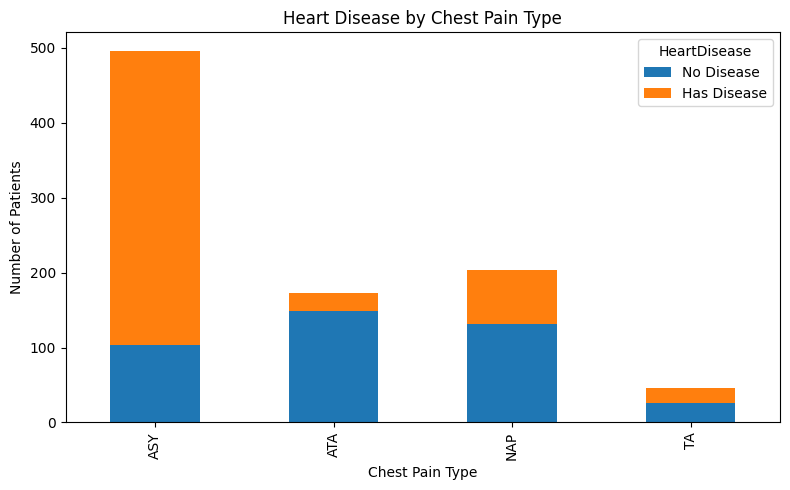

In [8]:
import matplotlib.pyplot as plt

# Bar chart: Chest pain type vs heart disease
chest_vs_disease.plot(kind='bar', stacked=True, figsize=(8,5))

# Titles and labels
plt.title("Heart Disease by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Has Disease"], title="HeartDisease")
plt.tight_layout()

# Show the chart
plt.show()

### Chest Pain Type vs. Heart Disease

This bar chart shows the number of patients with and without heart disease across different chest pain types.

- Most patients with **asymptomatic chest pain (ASY)** have heart disease.
- **ATA** and **NAP** are more common in patients without heart disease.

🔍 This insight may help prioritize further cardiac screening for patients reporting ASY chest pain.

Heart disease cases by Gender

In [9]:
# Group by Sex and HeartDisease
gender_vs_disease = df.groupby('Sex')['HeartDisease'].value_counts().unstack()
print(gender_vs_disease)

HeartDisease    0    1
Sex                   
F             143   50
M             267  458


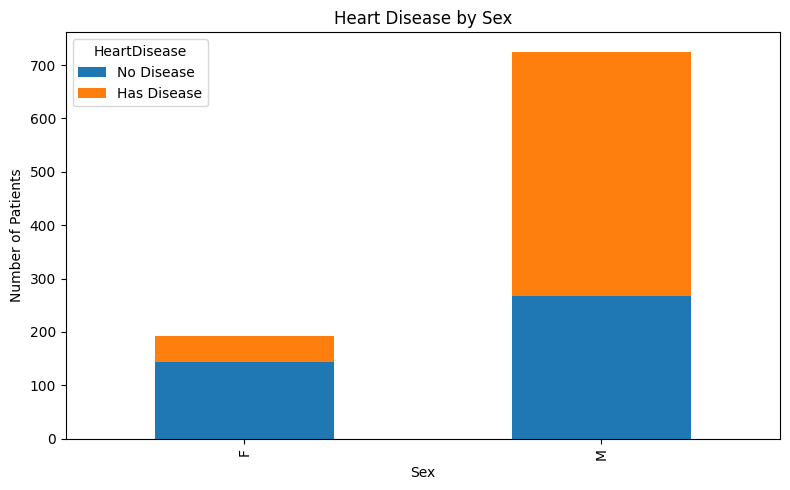

In [10]:
# Bar Chart : Sex vs Heart Disease
gender_vs_disease.plot(kind='bar', stacked=True, figsize=(8,5))

# Titles and labels
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Has Disease"], title="HeartDisease")
plt.tight_layout()

# Show the chart
plt.show()

### Heart Disease Risk by Gender

The chart shows the number of patients with and without heart disease, grouped by sex:

- Among **male patients**, a large majority (458) have heart disease.
- Among **female patients**, the majority (143) do **not** have heart disease.

🔍 This suggests that in this dataset, **male patients are more likely to have heart disease**.

### What Do the Chest Pain Types Mean?

- **ASY (Asymptomatic)**: No chest pain reported, but other clinical signs may suggest heart issues. This type is often linked to silent or undetected heart disease.
- **ATA (Atypical Angina)**: Chest discomfort not clearly linked to heart problems. May vary with breathing, movement, or position.
- **NAP (Non-Anginal Pain)**: Chest pain likely caused by non-heart issues such as muscle strain, anxiety, or digestion.
- **TA (Typical Angina)**: Classic heart-related chest pain, often triggered by exertion and relieved with rest. Strongly associated with coronary artery disease.

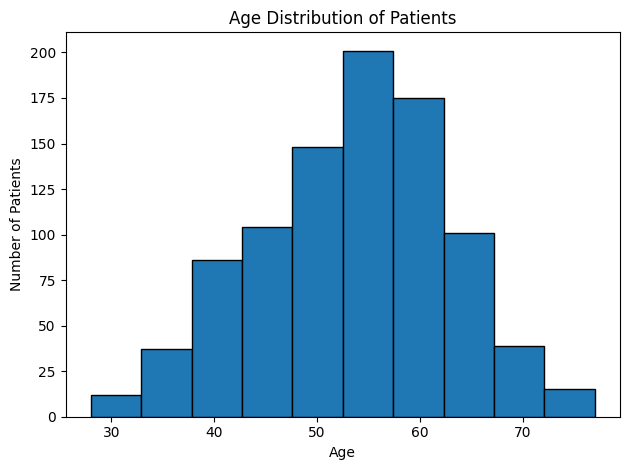

In [11]:
import matplotlib.pyplot as plt

# Histogram: Age distribution
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

The majority of heart-related data points are for middle-aged to older adults.

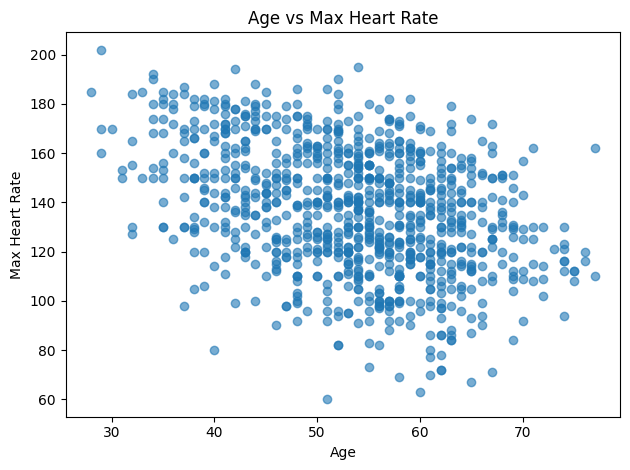

In [12]:
# Scatter plot: Age vs Max Heart Rate
plt.scatter(df['Age'], df['MaxHR'], alpha=0.6)
plt.title("Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.tight_layout()
plt.show()

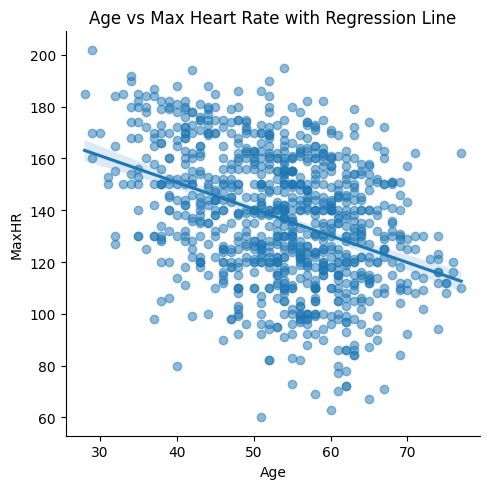

In [13]:
import seaborn as sns
# Regression plot: Age vs Max Heart Rate
sns.lmplot(data=df, x='Age', y='MaxHR', scatter_kws={'alpha':0.5})
plt.title("Age vs Max Heart Rate with Regression Line")
plt.tight_layout()
plt.show()

The regression line confirms there is a negative relationship between Age and Heart Rate. As age increases, heart rates decreases.

In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80])

In [15]:
grouped = df.groupby('AgeGroup', observed=False)['Cholesterol'].mean()

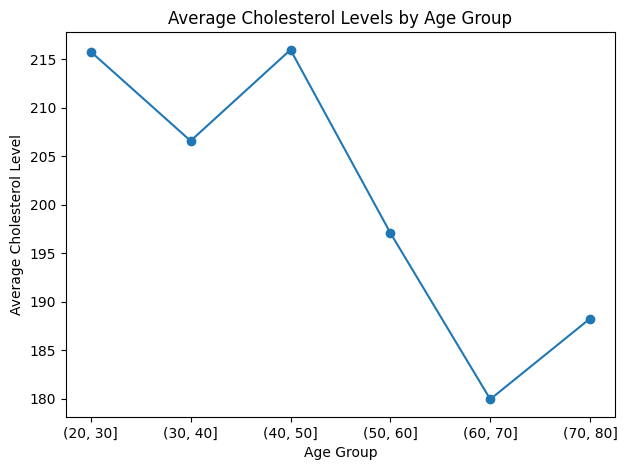

In [16]:
grouped.sort_index().plot(kind='line', marker='o')
plt.title("Average Cholesterol Levels by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Cholesterol Level")
plt.tight_layout()
plt.show()

Average Cholesterol Levels by Age Group

This chart shows the average cholesterol levels for different age groups in the dataset.
	•	Purpose: To understand how cholesterol levels vary with age.
	•	Observation:
	•	Cholesterol levels appear to peak around the 40–50 age group.
	•	There’s a declining trend in older age groups (50+), with a slight increase again in the 70–80 range.
	•	This could reflect lifestyle changes, medical interventions, or survivorship bias.

📌 Grouping by age ranges helps spot general trends more clearly than using raw age values.

In [17]:
# Calculate correlations
correlation_matrix = df.corr(numeric_only=True)

# Display
print(correlation_matrix)

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


### 💡 What Is "Oldpeak"?

**Oldpeak** refers to the amount of **ST depression** observed in an ECG during exercise (usually a treadmill stress test).

#### 📉 What is ST Depression?

- The **ST segment** is a part of the heart’s electrical signal seen on an ECG.
- Normally, it appears flat (level with baseline).
- If it **dips below the baseline**, it's called **ST depression**.

#### 🫀 What Does It Indicate?

| Oldpeak Value | Meaning                              | Possible Significance                        |
|---------------|--------------------------------------|----------------------------------------------|
| **0.0**       | Normal — no ST depression            | Healthy heart response during exercise       |
| **> 0.0**     | Abnormal — ST segment is depressed   | Possible reduced blood flow to heart muscle (e.g., coronary artery disease) |

So in this dataset, a **higher Oldpeak value** can be a sign of heart stress and is therefore **positively correlated with heart disease**.

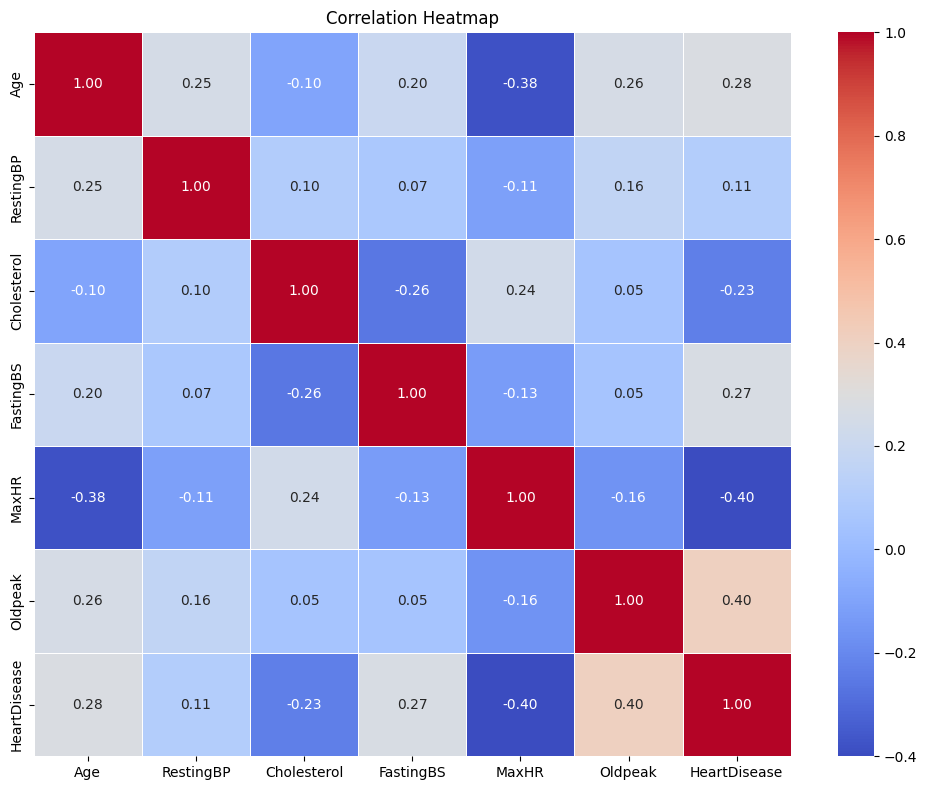

In [18]:

# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# 🔍 Correlation Insights

The heatmap shows how strongly different numeric features relate to heart disease and each other. Here are the key takeaways:

📌 Strongest correlations with Heart Disease:
	•	Oldpeak (ST depression): +0.40
↪ Higher ST depression is linked with a higher chance of heart disease.
	•	Max Heart Rate (MaxHR): -0.40
↪ Lower maximum heart rate tends to be associated with heart disease.
	•	Age: +0.28
↪ Older patients are more likely to have heart disease.
	•	Fasting Blood Sugar (FastingBS): +0.27
↪ High fasting blood sugar may be linked to higher heart disease risk.

📉 Weak or Negative Correlations:
	•	Cholesterol: -0.23
↪ Surprisingly, higher cholesterol doesn’t strongly indicate heart disease in this dataset.
	•	Resting Blood Pressure (RestingBP): +0.11
↪ Very weak correlation.

In [19]:
# Compare average cholesterol between patients with and without heart disease
cholesterol_by_disease = df.groupby('HeartDisease')['Cholesterol'].mean()

print("Average Cholesterol:")
print(cholesterol_by_disease)

Average Cholesterol:
HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64


### 🧠 Cholesterol vs Heart Disease

**Observation:**

| HeartDisease | Avg. Cholesterol |
|--------------|------------------|
| No (0)       | 227.12           |
| Yes (1)      | 175.94           |

Patients **without** heart disease had a **higher average cholesterol** in this dataset, which may feel counterintuitive.

**Possible reasons:**
- Patients diagnosed with heart disease may be on **cholesterol-lowering medications** or **special diets**
- Cholesterol alone may not be a **strong enough predictor** in this dataset

In [20]:
# Compare average MaxHR between patients with and without heart disease
maxhr_by_disease = df.groupby('HeartDisease')['MaxHR'].mean()

print("Average Max Heart Rate:")
print(maxhr_by_disease)

Average Max Heart Rate:
HeartDisease
0    148.151220
1    127.655512
Name: MaxHR, dtype: float64


### 🧠 Max Heart Rate vs Heart Disease

**Observation:**

| HeartDisease | Avg. MaxHR |
|--------------|------------|
| No (0)       | 148.15     |
| Yes (1)      | 127.66     |

Patients with heart disease had a **lower average maximum heart rate**, suggesting limited cardiovascular performance during physical exertion.

This supports our earlier correlation finding where **MaxHR was negatively correlated** with heart disease.

In [21]:
# Count how many patients have FastingBS = 0 or 1
print(df['FastingBS'].value_counts())

FastingBS
0    704
1    214
Name: count, dtype: int64


In [22]:
# Average FastingBS by heart disease status
print(df.groupby('HeartDisease')['FastingBS'].mean())

HeartDisease
0    0.107317
1    0.334646
Name: FastingBS, dtype: float64


### 🔍 Fasting Blood Sugar vs Heart Disease

Patients with heart disease were significantly more likely to have high fasting blood sugar (> 120 mg/dL):

| HeartDisease | Avg. FastingBS |
|--------------|----------------|
| No           | 0.107          |
| Yes          | 0.335          |

This suggests elevated fasting blood sugar could be a meaningful indicator for heart disease risk.

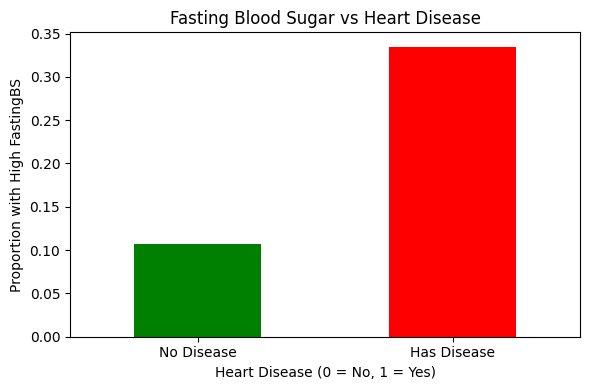

In [23]:
# Calculate the average FastingBS per group again
fasting_group = df.groupby('HeartDisease')['FastingBS'].mean()

# Plot
fasting_group.plot(kind='bar', color=['green', 'red'], figsize=(6, 4))

# Titles and labels
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Proportion with High FastingBS")
plt.xticks([0, 1], ['No Disease', 'Has Disease'], rotation=0)
plt.tight_layout()
plt.show()

Fasting Blood Sugar and Heart Disease Risk

The chart above shows the proportion of patients with high fasting blood sugar (FastingBS = 1), grouped by heart disease status:
	•	Patients with heart disease: ~33% have high fasting blood sugar.
	•	Patients without heart disease: ~11% have high fasting blood sugar.

💡 Insight:
Patients with heart disease are 3 times more likely to have elevated fasting blood sugar.
This suggests that high fasting blood sugar may be a significant risk factor or warning sign for heart disease.

In [24]:
# Average RestingBP by HeartDisease
avg_bp = df.groupby('HeartDisease')['RestingBP'].mean()
print("Average RestingBP:")
print(avg_bp)

Average RestingBP:
HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64


Resting Blood Pressure vs Heart Disease
	•	Patients without heart disease: Average RestingBP = 130.18 mm Hg
	•	Patients with heart disease: Average RestingBP = 134.18 mm Hg

➡️ This suggests a slightly higher resting blood pressure among those with heart disease.
However, the difference is not large, so RestingBP alone may not be a strong predictor of heart disease in this dataset.

🫀 Feature: RestingECG (Electrocardiographic Results)

This is a categorical variable that describes the results of an ECG at rest.

Possible values:
	•	"Normal" – normal resting ECG
	•	"ST" – ST-T wave abnormality (possible mild heart stress)
	•	"LVH" – signs of left ventricular hypertrophy (heart thickening)

In [25]:
print(df['RestingECG'].value_counts())

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


In [26]:
# Cross-tabulate RestingECG and HeartDisease
ecg_vs_disease = pd.crosstab(df['RestingECG'], df['HeartDisease'])
print(ecg_vs_disease)

HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117


### Resting ECG and Heart Disease

| ECG Type | No Disease | Has Disease |
|----------|------------|-------------|
| Normal   | 267        | 285         |
| ST       | 61         | 117         |
| LVH      | 82         | 106         |

🧠 Patients with ST abnormalities were almost **twice as likely** to have heart disease.  
LVH also shows a slight increase in heart disease cases.  
Normal ECG appears in both groups, so it's less helpful for prediction.

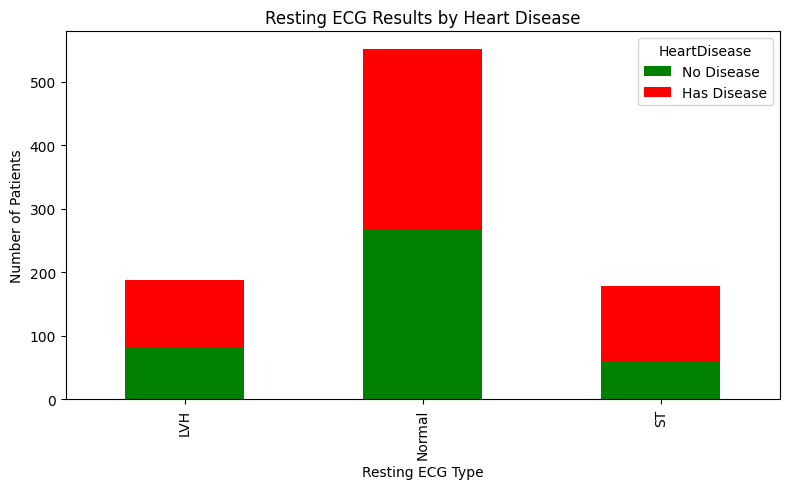

In [27]:
# Plot
ecg_vs_disease.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'red'])

# Labels and titles
plt.title("Resting ECG Results by Heart Disease")
plt.xlabel("Resting ECG Type")
plt.ylabel("Number of Patients")
plt.legend(["No Disease", "Has Disease"], title="HeartDisease")
plt.tight_layout()

# Show the plot
plt.show()